<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: Final Project</h1>
### By Kayla Besong

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Import Necessary Packages & Set Directory

In [116]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import matplotlib.animation as manimation
import os
from JSAnimation.IPython_display import display_animation, anim_to_html
import seaborn as sns
from matplotlib import gridspec
import scipy.stats as stats
import imageio
from PIL import Image 


path="/Users/kaylabesong/anaconda2/MPO624-2018/assignments/Final_Project"
print(path)
os.chdir(path)

/Users/kaylabesong/anaconda2/MPO624-2018/assignments/Final_Project


### Data Processing Functions
#### Makes it easy to loop through a number of different model runs or datasets with different names

In [62]:
def psi_process_for_vid(run_n, timestep):
    
    path2 = path + "/run_U%s" % run_n
    os.chdir(path2)
    
    data1 = nc.Dataset('test_kayla_U%s.nc' % run_n, 'r')
    
    psi1 = data1.variables['psi'][:]

    return psi1


def psi_process1(run_n, timestep):
    
    path2 = path + "/run_U%s" % run_n
    os.chdir(path2)
    

    data1 = nc.Dataset('test_kayla_U%s.nc' % run_n, 'r')
    
    psi1 = data1.variables['psi'][:]
    
    
    t1 = len(psi1[0])
    t2 = len(psi1[0][0])
    
    t3 = np.empty((t1, t2), dtype = 'float')
    
    
    for i in range(0, t1):
        
        for j in range(0, t2):
            
            t3[i,j] = psi1[timestep][i][j]
            
            
    x = np.arange(0, t1, 1)
    y = np.arange(0, t2, 1)

    return x,y,t3



def energy_process(run_n, run_type):    
    
    path2 = path + "/run_U%s" % run_n
    os.chdir(path2)    
    
    with open('%s_run_U%s.dat' % (run_type, run_n)) as db:
        for line in db.readlines():
            data = line.strip().split(',')
            e = np.empty([len(data)])
            for e_val in range(0, len(data)):
                
                e[e_val] = float(data[e_val])
    db.close()
    
    return e


## Initial Look at What the Data Might Hold
### Important to raise questions, anticipate any errors or biases, and help determine the best type of analysis  

# Looking at the Evolution of Energy
### A simple timeseries is appropriate

In [63]:
### Proccessing of each type of energy output between model layers

EKE_1 = energy_process('2f','eke1')
EKE_2 = energy_process('2f','eke2')
EPE = energy_process('2f','epe')


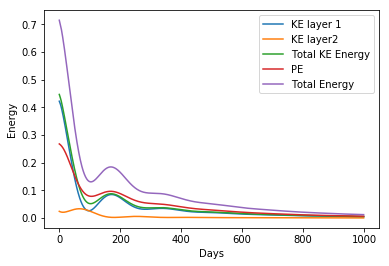

In [64]:
### Create Timeseries Plot

t = np.arange(0, len(EKE_1))

plt.plot(t, EKE_1, label = 'KE layer 1')
plt.plot(t, EKE_2, label = 'KE layer2')
plt.plot(t, EKE_1+ EKE_2, label = 'Total KE Energy')
plt.plot(t, EPE, label = 'PE')
plt.plot(t, EKE_1+ EKE_2+EPE, label = 'Total Energy')
plt.xlabel('Days')
plt.ylabel('Energy')
plt.legend()


# Energetic Relationships

## What exactly is the relationship between the APE and KE in layer1 and layer2?
## What about between KE in layer1 and layer2?

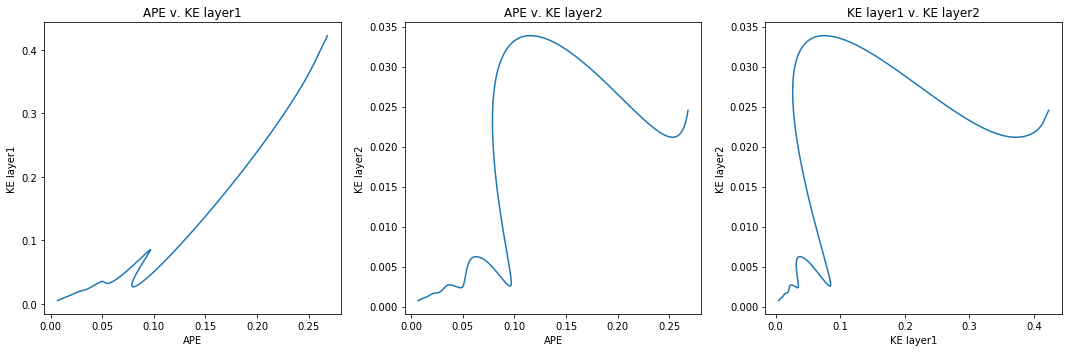

In [68]:
### Simple scatter between KE in the two layers

f, ax = plt.subplots(1,3, figsize = (15, 5))

ax[0].plot(EPE, EKE_1)
ax[0].set_title('APE v. KE layer1')
ax[0].set_xlabel("APE")
ax[0].set_ylabel("KE layer1")

ax[1].plot(EPE, EKE_2)
ax[1].set_title('APE v. KE layer2')
ax[1].set_xlabel("APE")
ax[1].set_ylabel("KE layer2")

ax[2].plot(EKE_1, EKE_2)
ax[2].set_title('KE layer1 v. KE layer2')
ax[2].set_xlabel("KE layer1")
ax[2].set_ylabel("KE layer2")

f.tight_layout(h_pad = .5)

plt.show()


### A complex relationship between energy within the system is clearly present and other factors are likely present
### The conservation of energy is much more complex (nonlinear) than PE = KE1 + KE2 for this system as it progresses over time 


## What about the relationship between KE in layers 1 and 2

/Users/kaylabesong/anaconda2/envs/MPO624/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


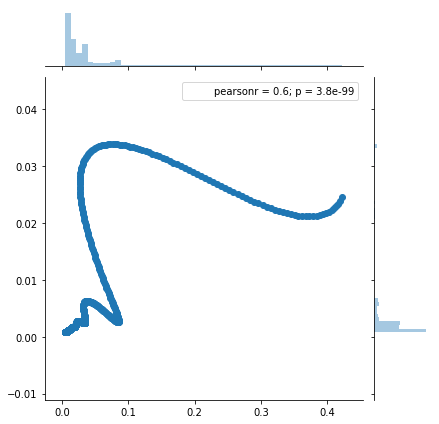

In [69]:
sns.jointplot(EKE_1, EKE_2, kind = 'scatter')

/Users/kaylabesong/anaconda2/envs/MPO624/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


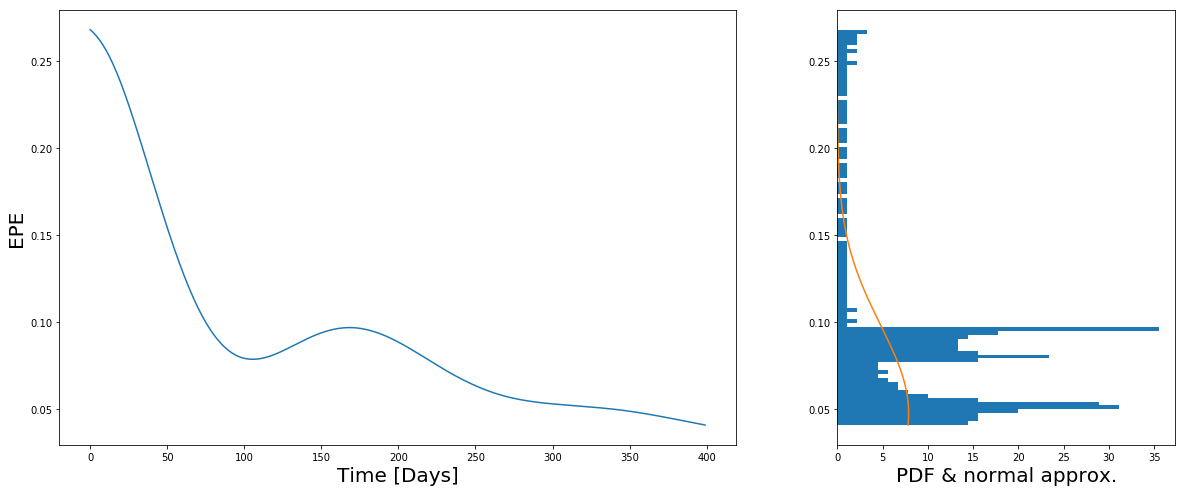

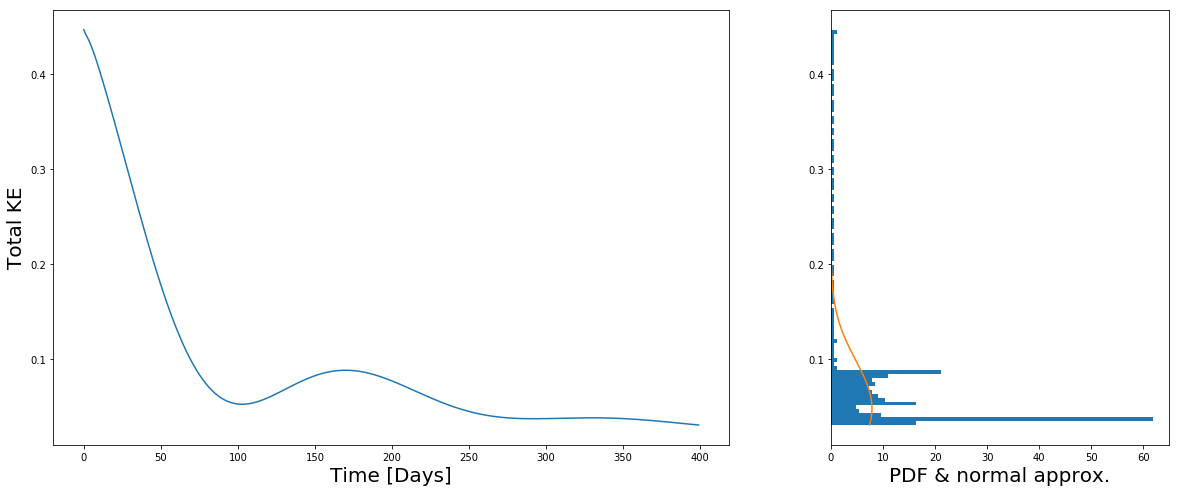

In [72]:
def fig1(y_val, label1):
    fig=plt.figure(figsize = (20,8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
    ax=fig.add_subplot(gs[0])
    ax.plot(range(0,len(y_val)), y_val)
    ax.set_xlabel('Time [Days]', fontsize = 20);ax.set_ylabel('%s' % label1, fontsize = 20);
    ax=fig.add_subplot(gs[1]); ax.set_xlabel('PDF & normal approx.', fontsize = 20)
    n,bins,pa=ax.hist(y_val,101,orientation='horizontal', \
                      normed='True',label='pdf of %s' % label1)
    # Approximate it with a normal distribution of same mean and std
    normapprox = stats.norm.pdf(bins,loc=np.mean(EPE),scale=np.std(EPE)) 
    ax.plot(normapprox, bins)

fig1(EPE[0:400], 'EPE')
fig1(EKE_1[0:400]+EKE_2[0:400], 'Total KE')

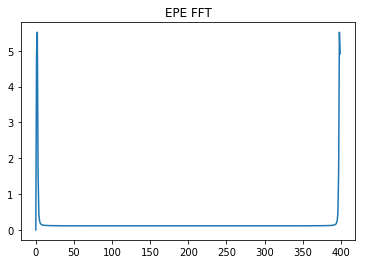

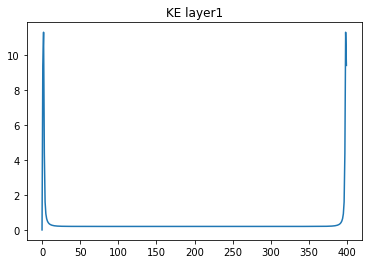

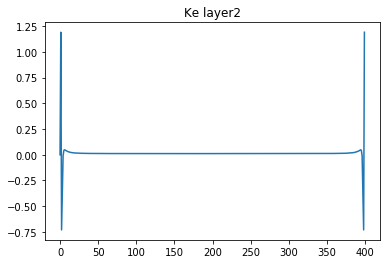

In [73]:
def fft_1(data, label1):
    # Take the simple FFT, after removing the mean
    V = data
    
    Vp = V - V.mean()

    #To match the sign above, roll the array so it starts at t=0. 
    # Vp = np.roll(Vp, int(-NT/2) ) Too fussy: just know the sign is opposite

    # BOOM! Notice there is no time axis, just the values, hence the roll issue above
    Vspec = np.fft.fft( Vp )

    # It is symmetric, with low frequencies at BOTH ENDS, except 0 (the mean)
    fig,ax=plt.subplots(1,1) 
    ax.plot(Vspec.real)
    ax.set_title(label1)
    #ax.plot(Vspec.imag)
    
epe_fft = fft_1(EPE[0:400], 'EPE FFT')
eke1_fft = fft_1(EKE_1[0:400], 'KE layer1')
eke2_fft = fft_1(EKE_2[0:400], 'Ke layer2')

# Look at the evolution of flow 

### Consider Various Snapshots

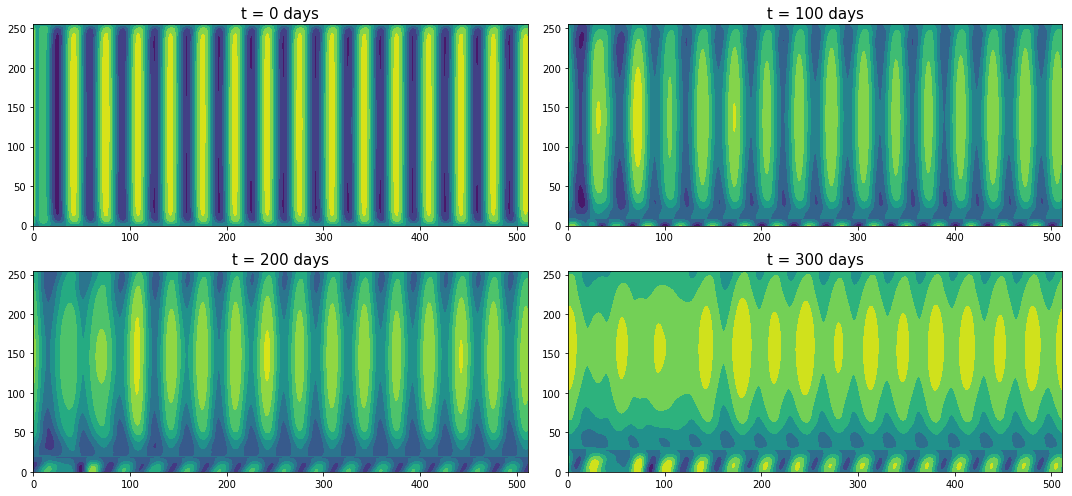

In [65]:
run_0 = psi_process1('2f',0)
run_10 = psi_process1('2f',9)
run_20 = psi_process1('2f',19)
run_30 = psi_process1('2f',29)

f1, axarr1 = plt.subplots(2, 2, figsize=(15,7))

axarr1[0, 0].contourf(run_0[1],run_0[0],run_0[2])
axarr1[0, 1].contourf(run_10[1],run_10[0],run_10[2])
axarr1[1, 0].contourf(run_20[1],run_20[0],run_20[2])
axarr1[1, 1].contourf(run_30[1],run_30[0],run_30[2])

axarr1[0, 0].set_title('t = 0 days', fontsize = 15)
axarr1[0, 1].set_title('t = 100 days', fontsize = 15)
axarr1[1, 0].set_title('t = 200 days', fontsize = 15)
axarr1[1, 1].set_title('t = 300 days', fontsize = 15)

f1.tight_layout(h_pad = 1.)


### Perhaps viewing as a movie instead of plotting multiple, random snapshots is better

In [66]:
## Animation function

def make_anime(ani_mat, run_n):
    
    fig, ax = plt.subplots()

    # Some 2D geo arrays to plot (time,lat,lon)
    data = ani_mat
    lat = np.arange(len(data[0,:,0]))
    lon = np.arange(len(data[0,0,:]))
    lons,lats = np.meshgrid(lon,lat)

    mode = 'contour'
    ims = []
    for i in range(len(data[:,0,0])):
        if mode == 'contour':
            im = ax.contourf(lons,lats,data[i,:,:])
            add_arts = im.collections

        ## Add title 
        text = 'Snapshot={0!r}'.format(i)
        an = ax.annotate(text, xy=(0.45, 1.05), xycoords='axes fraction')
        ims.append(add_arts + [an])
        
    ani = manimation.ArtistAnimation(fig, ims)
    
    ## For saving the animation we need ffmpeg binary:
    FFwriter = animation.FFMpegWriter()
    ani.save('run_U%s.mp4'% run_n, writer = FFwriter)
    
    return ani



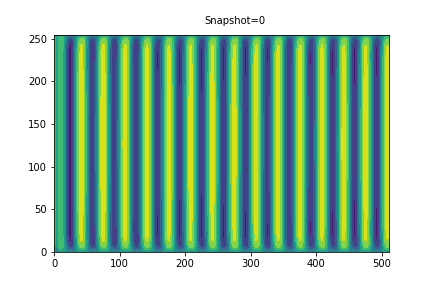
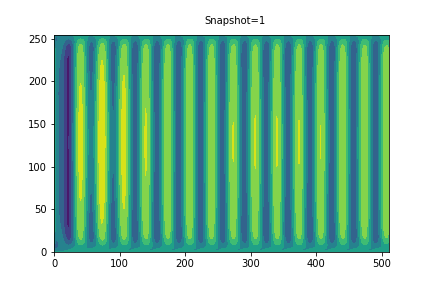
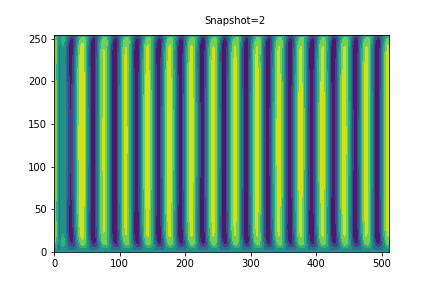
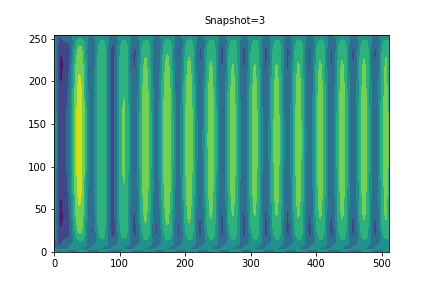
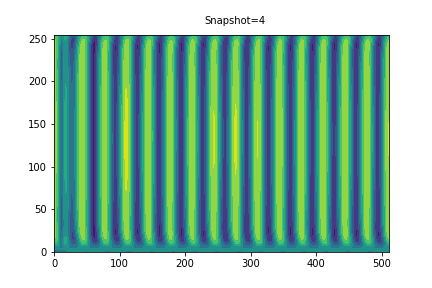
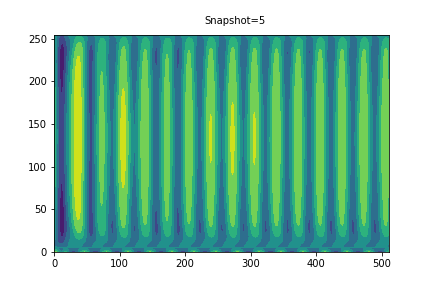
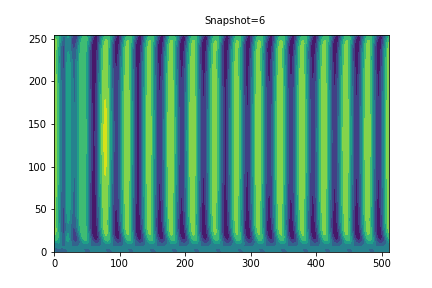
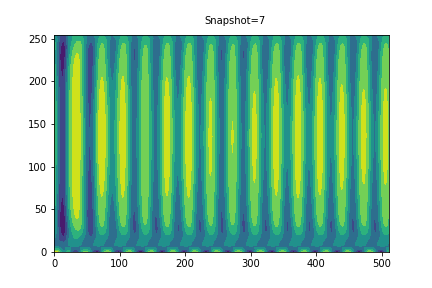
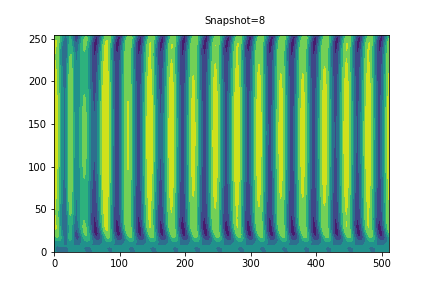
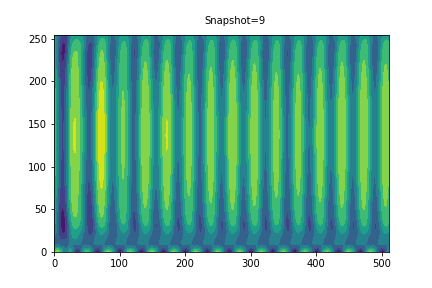
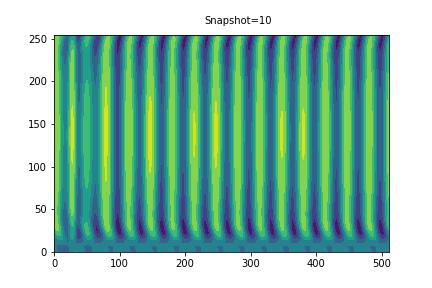
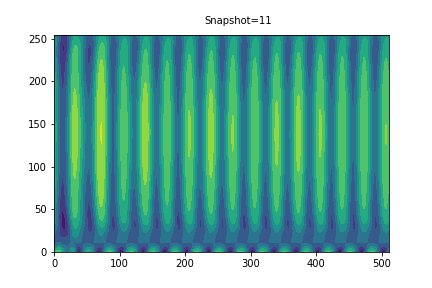
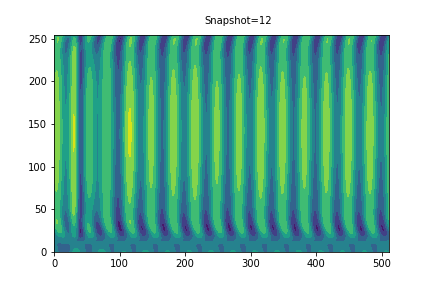
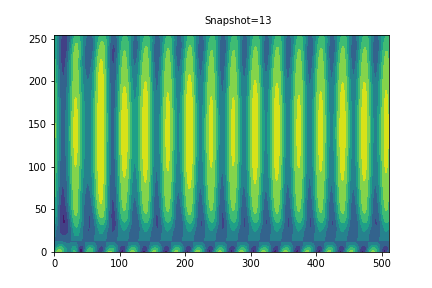
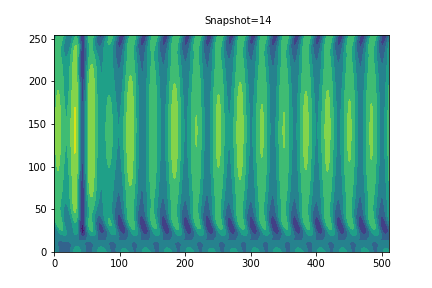
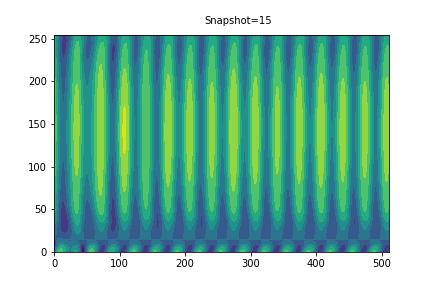
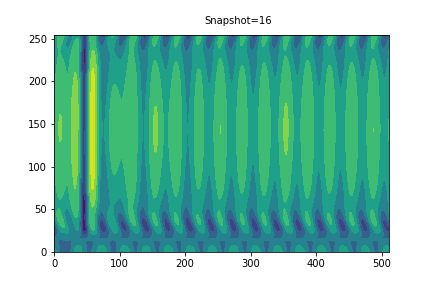
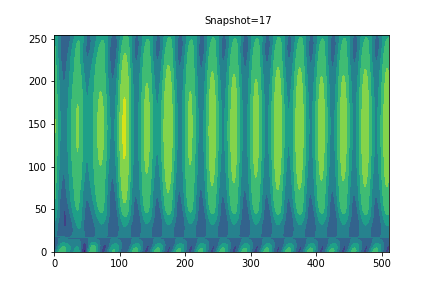
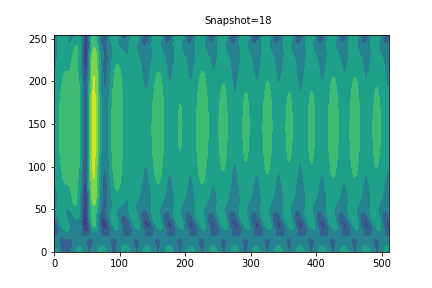
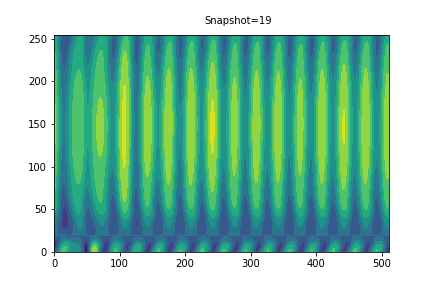
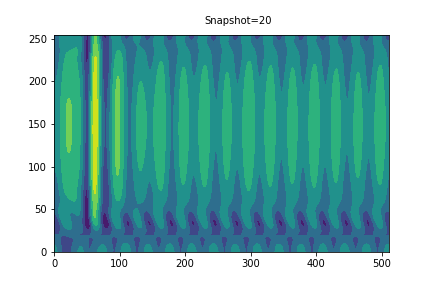
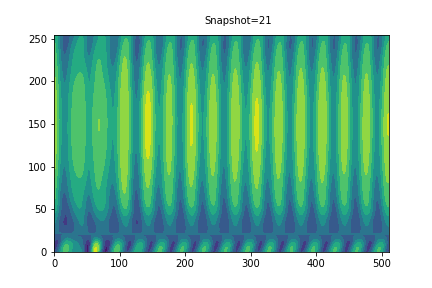
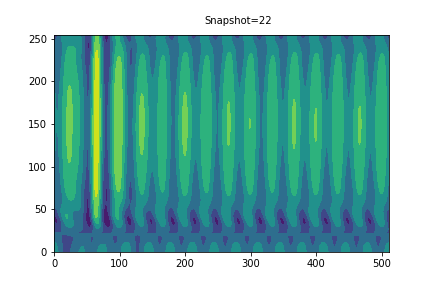
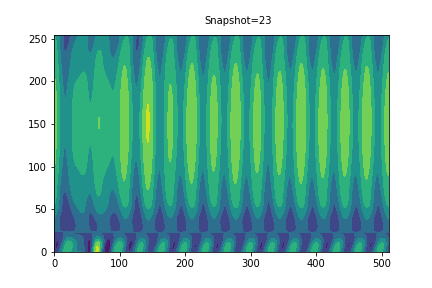
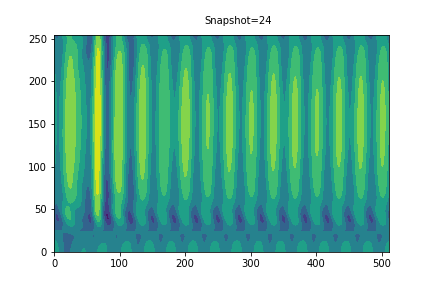
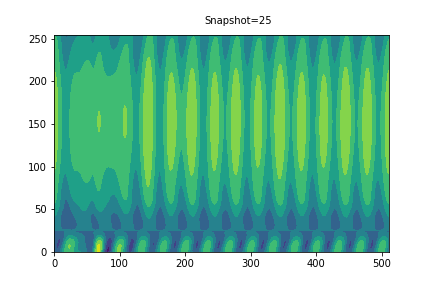
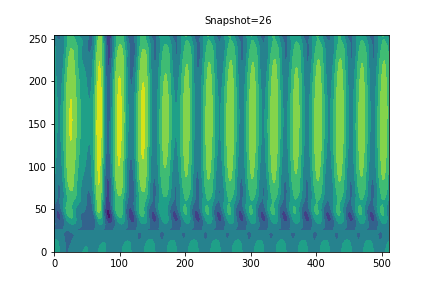
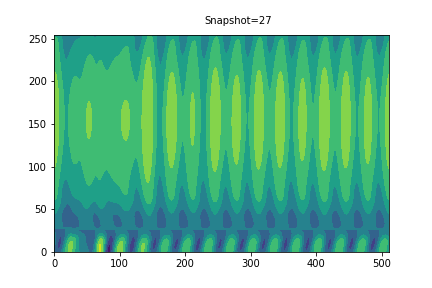
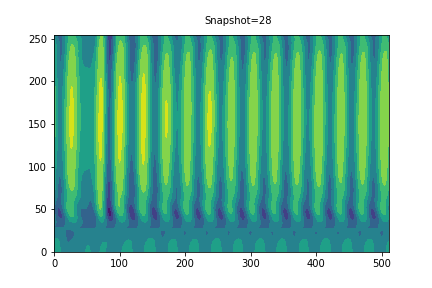
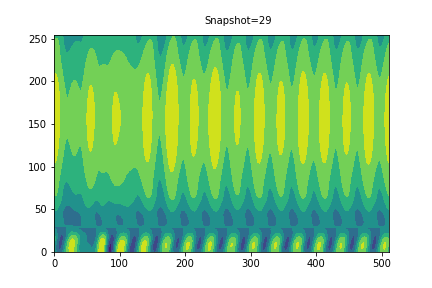
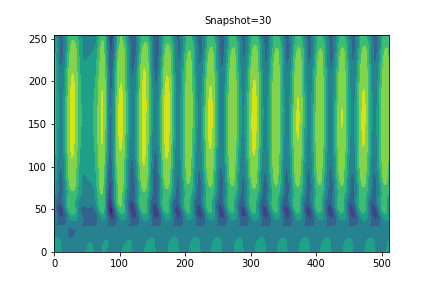
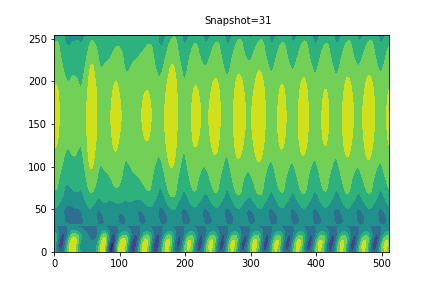
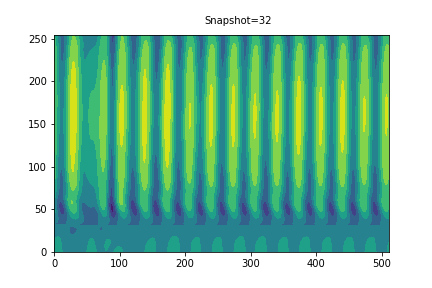
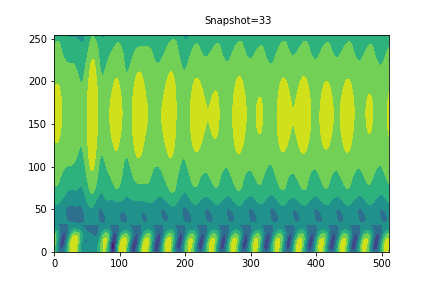
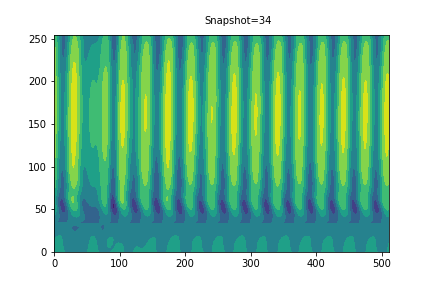
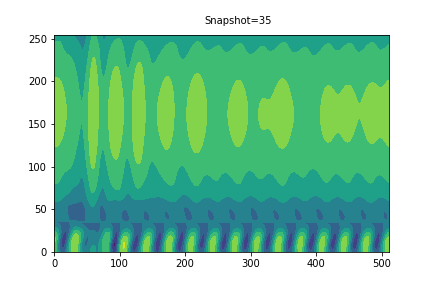
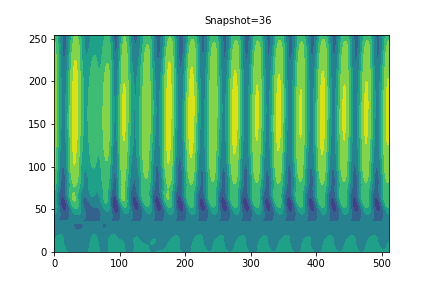
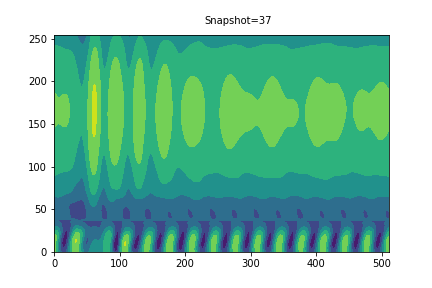
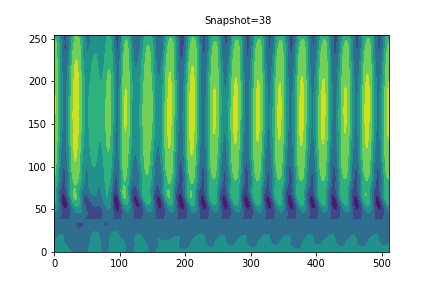
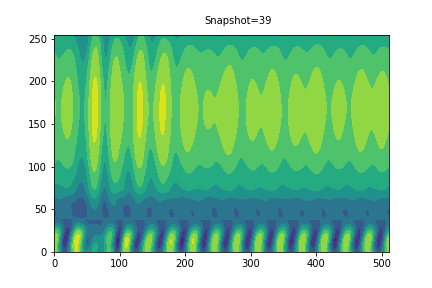
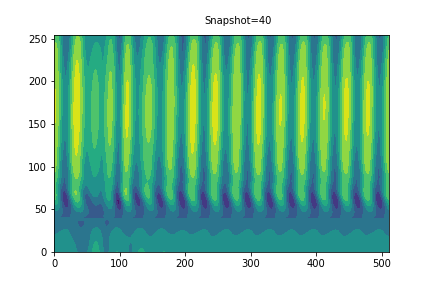
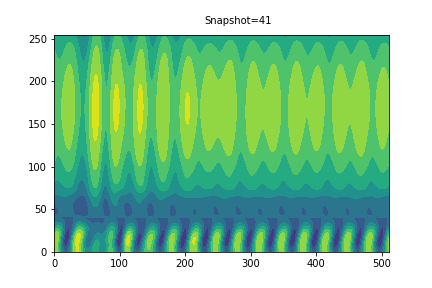
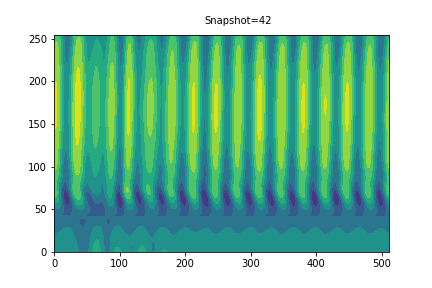
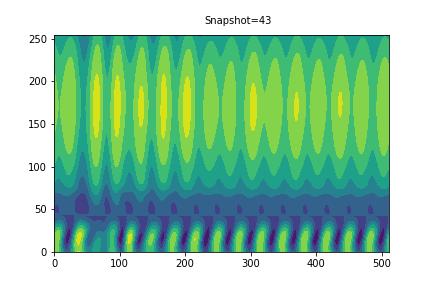
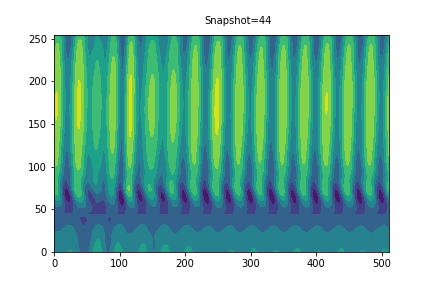
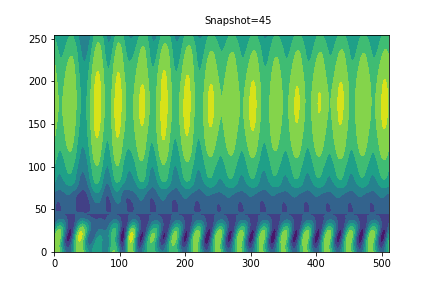
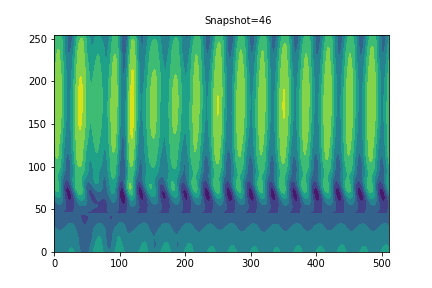
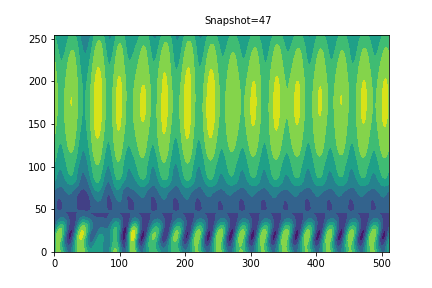
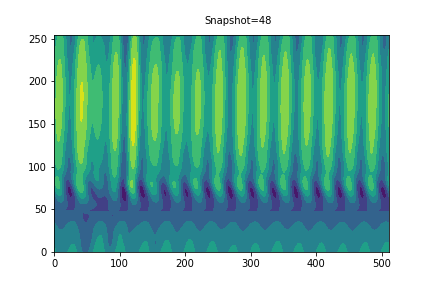
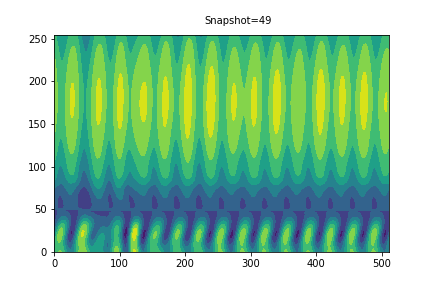
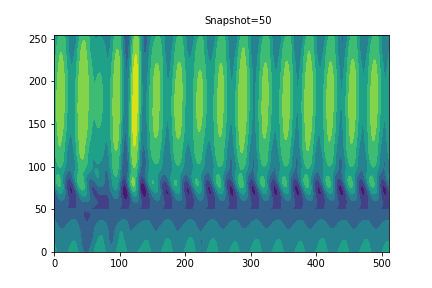
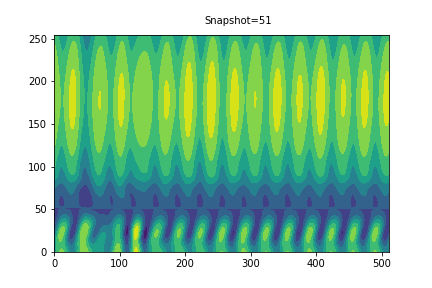
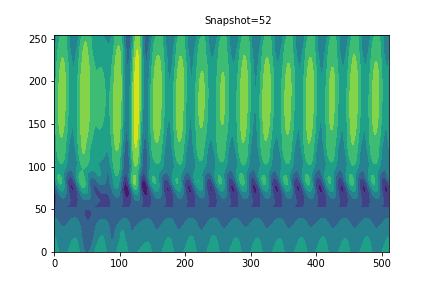
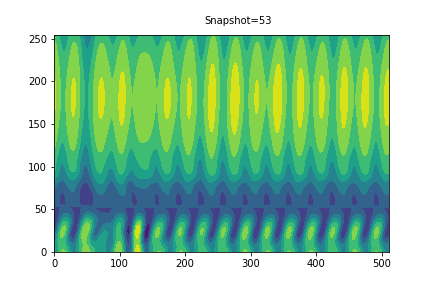
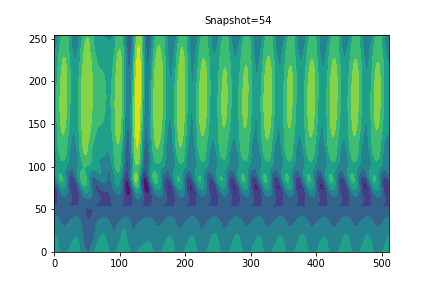
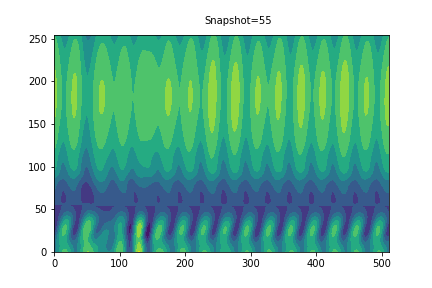
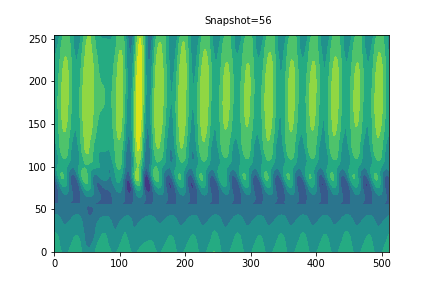
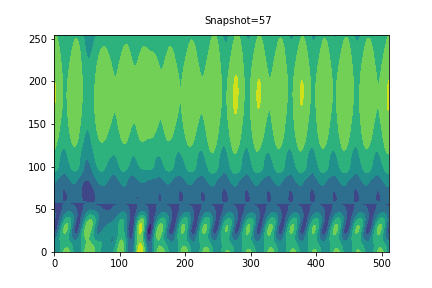
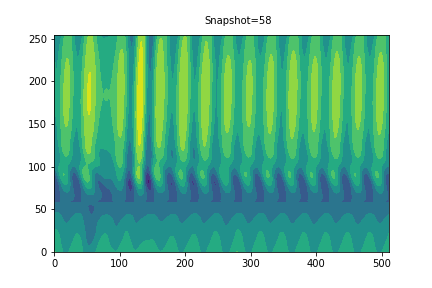
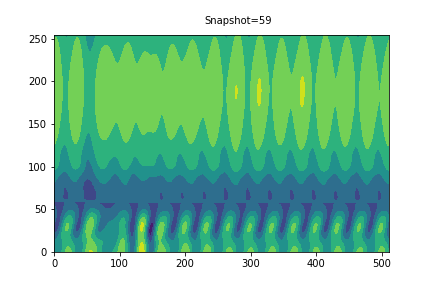
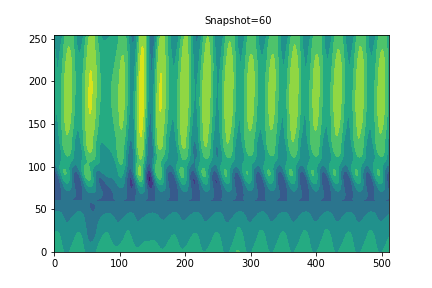
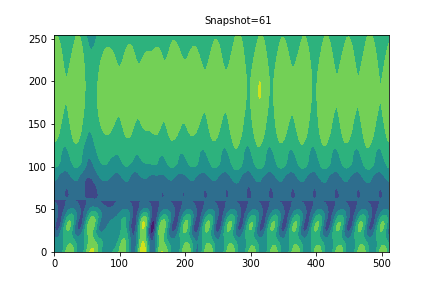
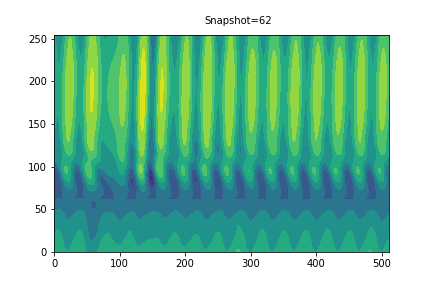
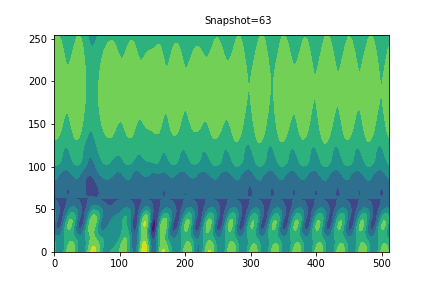
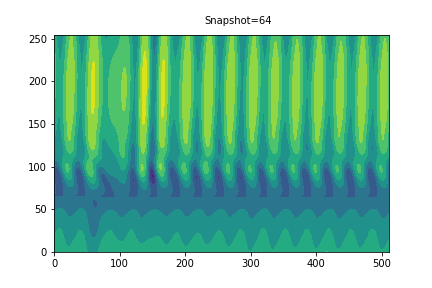
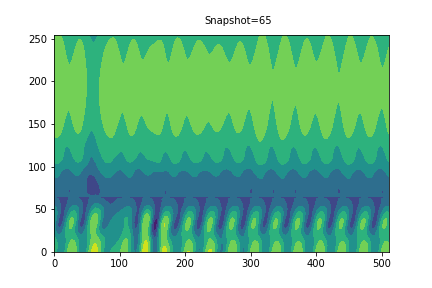
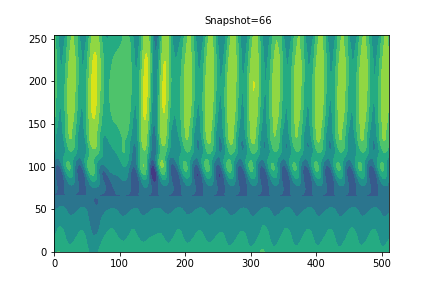
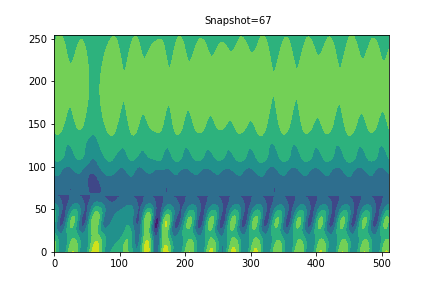
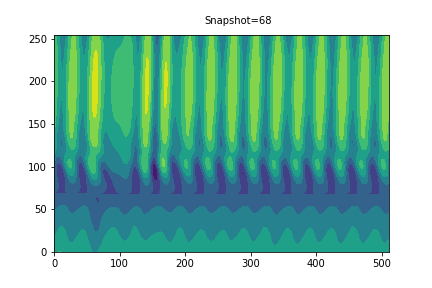
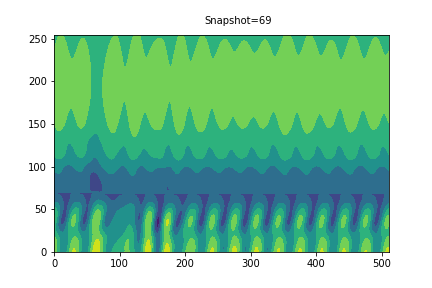
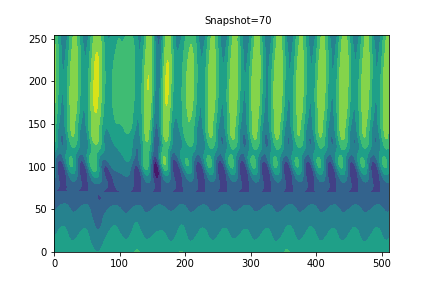
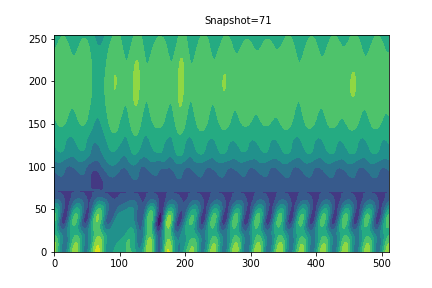
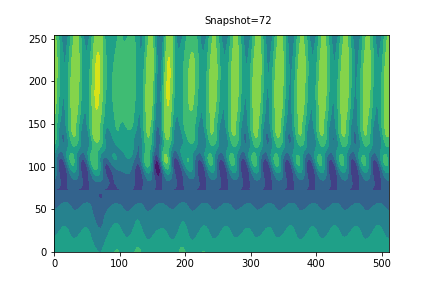
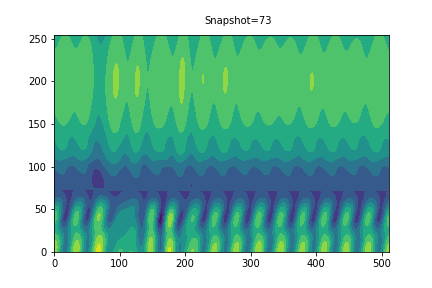
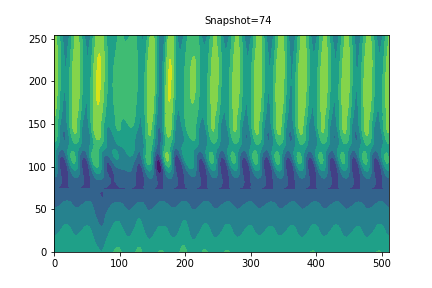
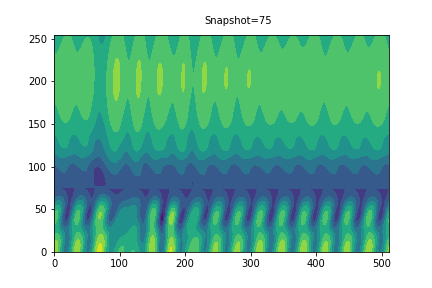
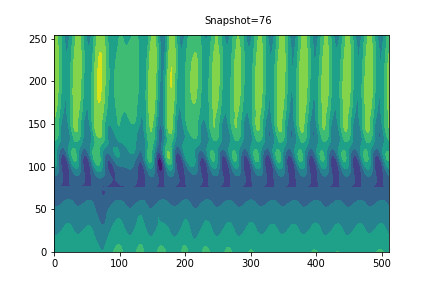
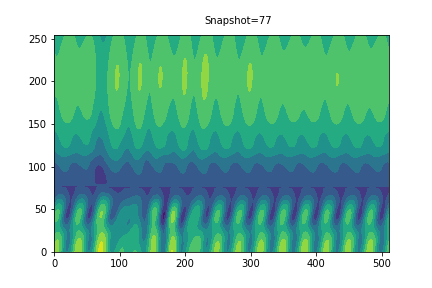
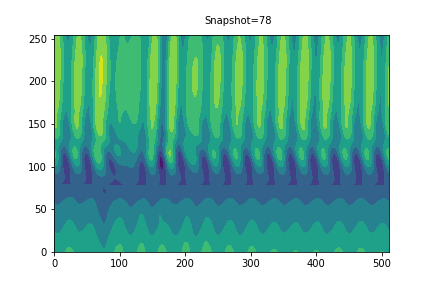
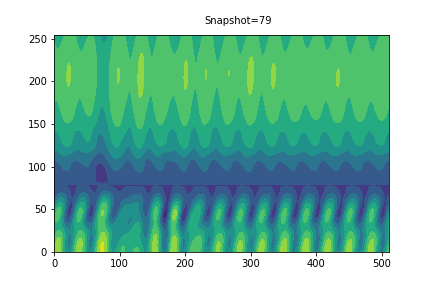
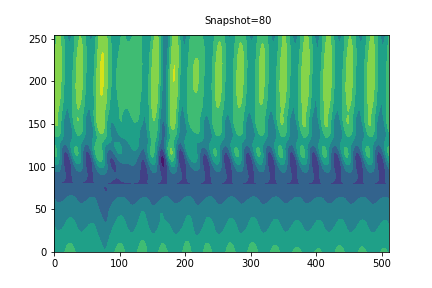
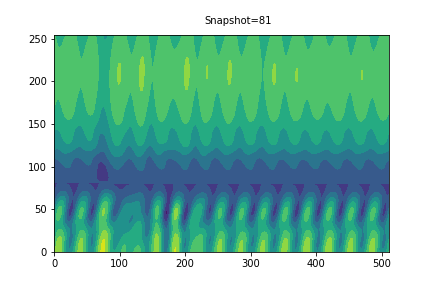
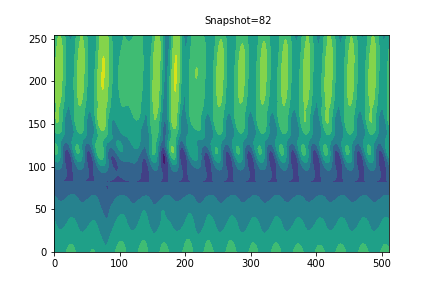
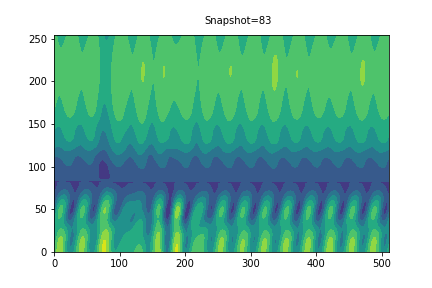
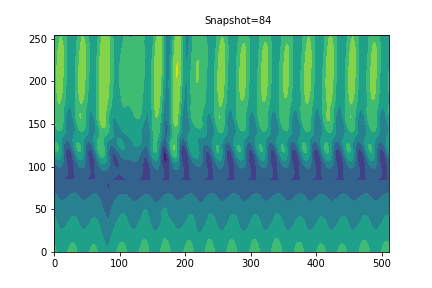
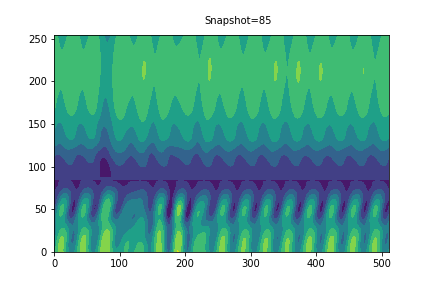
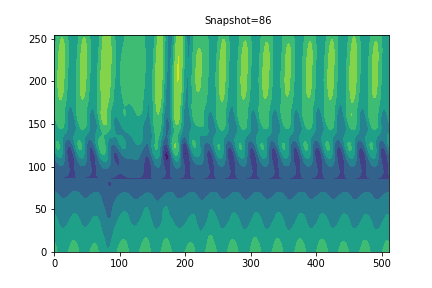
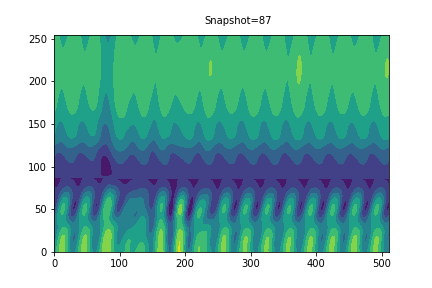
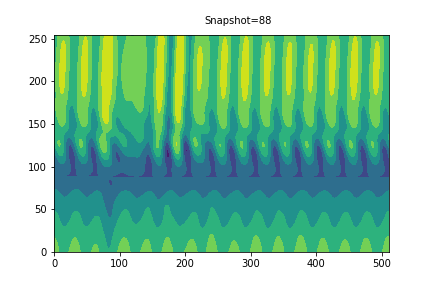
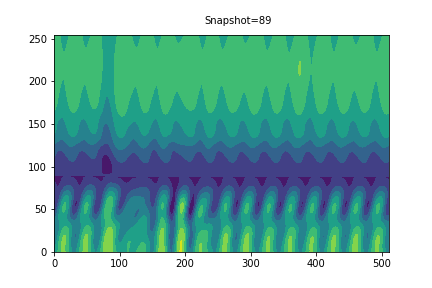
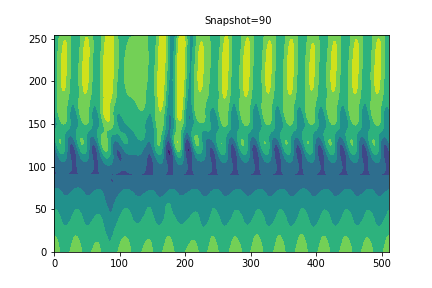
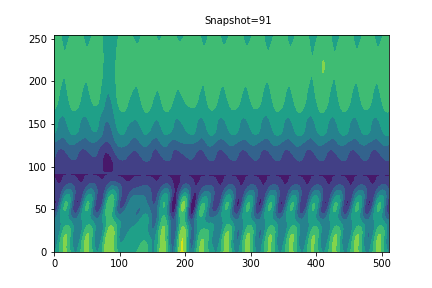
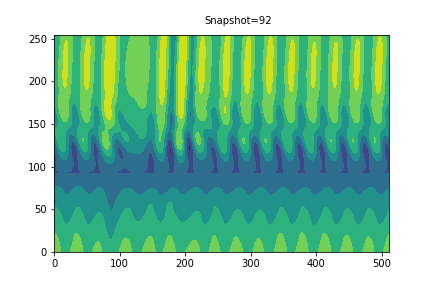
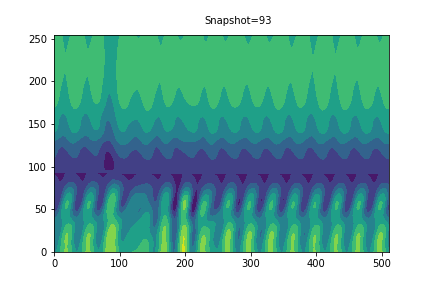
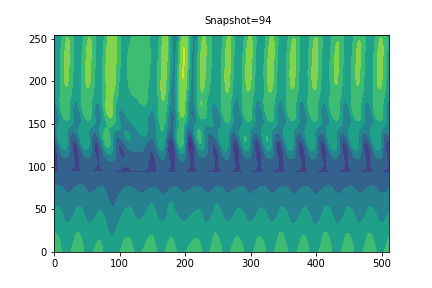
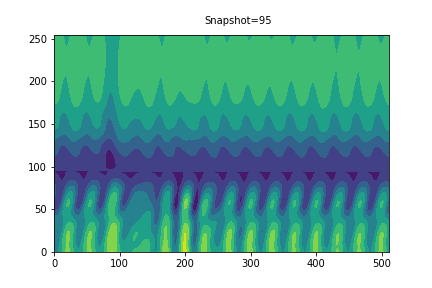
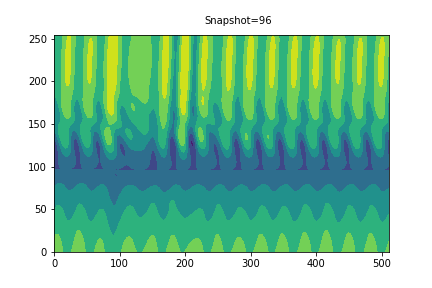
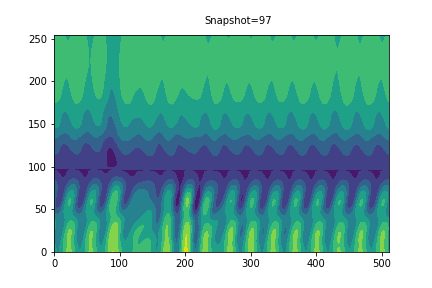
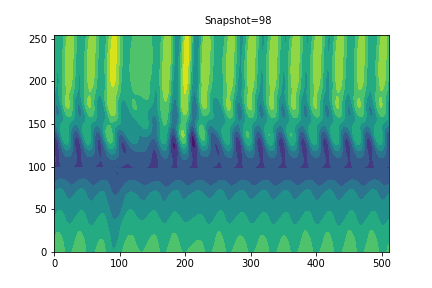
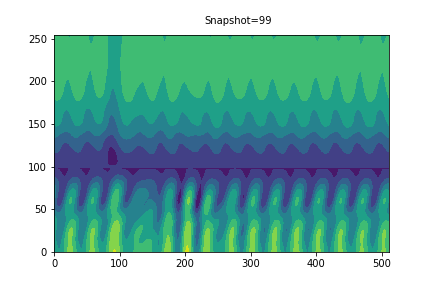

# EOF of Streamfunction for Video

In [83]:
filename = path + '/run_U2f/run_U2f.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')

#for i, im in enumerate(vid):
#    print('Mean of frame %i is %1.1f' % (i, im.mean()))

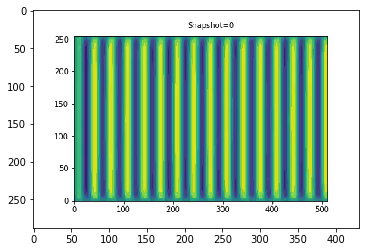

In [84]:
# Bizarre: reversed color table 
im = vid.get_data(0)
plt.imshow(im)

In [94]:
NFRAMES=11
stride = 9

dataset = np.zeros( (NFRAMES,288, 432, 3) )

for i in range(0,(NFRAMES)): 
    im = vid.get_data(i*stride)
    dataset[i,:,:,:] = im

np.shape(dataset)

(11, 288, 432, 3)

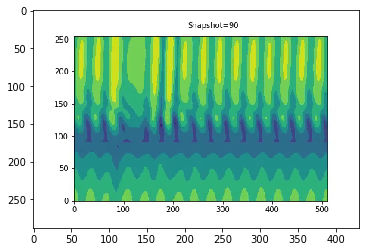

In [96]:
# from PIL import Image 

test = Image.fromarray(np.uint8(dataset[10,:,:,:]))
plt.imshow(test)


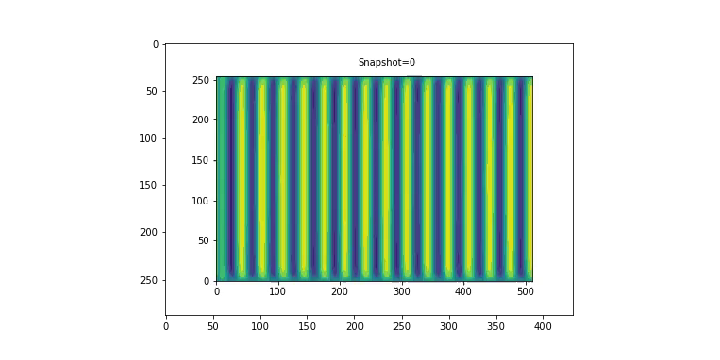
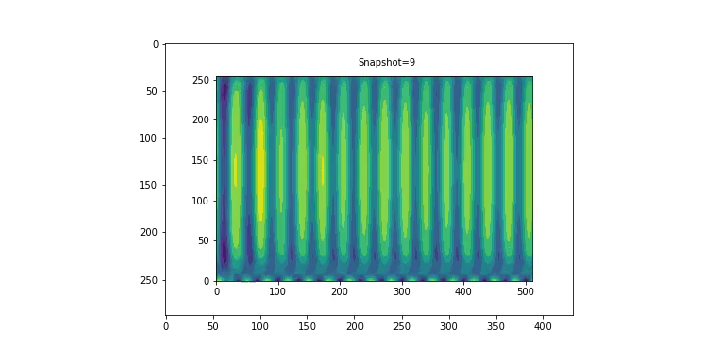
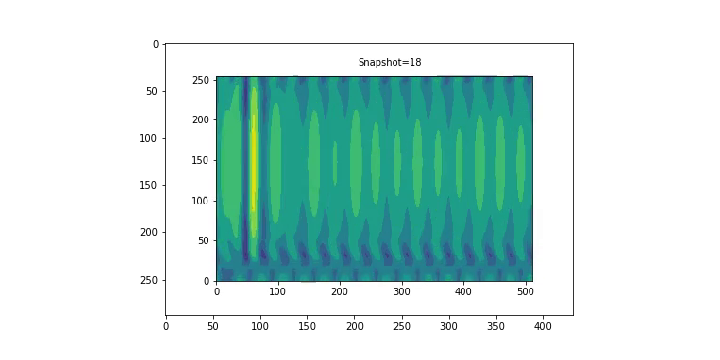
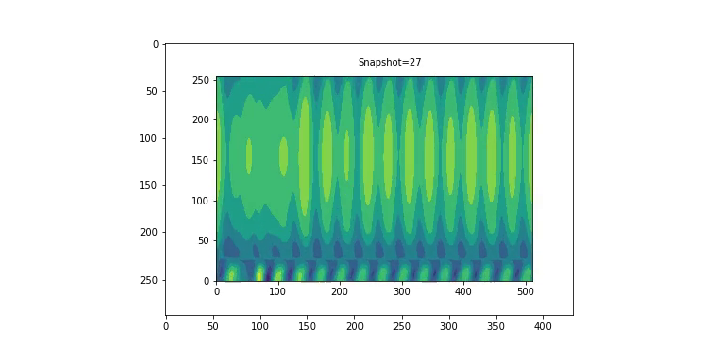
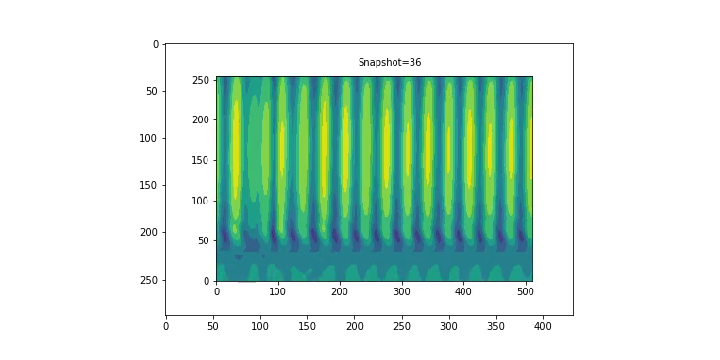
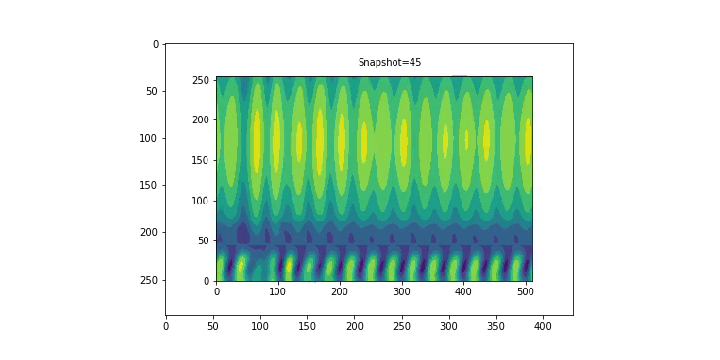
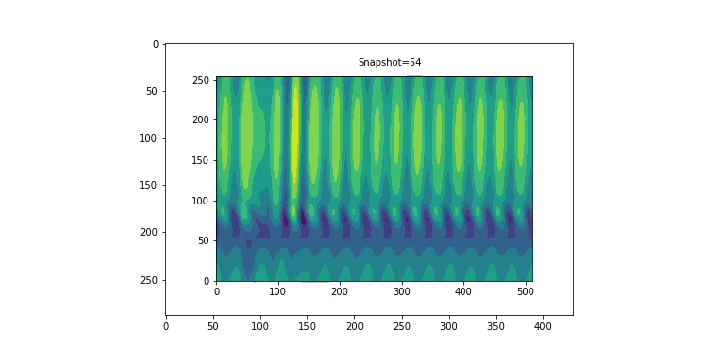
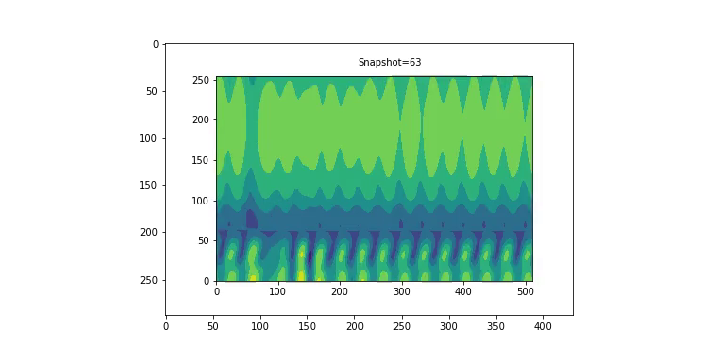
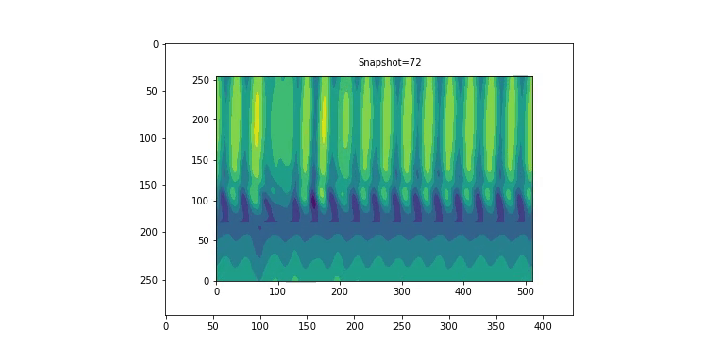
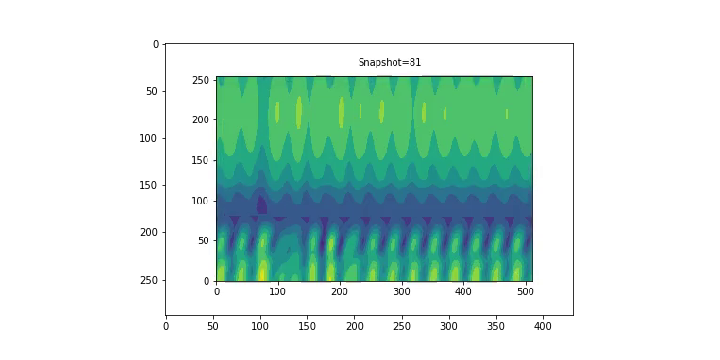

In [97]:
# Build the frames of the movie
fig, ax = plt.subplots(figsize=(10,5))

imcolor = Image.fromarray(np.uint8(dataset[0,:,:,:]))
frame = ax.imshow(imcolor)

# Build the artists array
artists = []
for it in range(0, NFRAMES-1):   
#    imcolor = cv2.cvtColor(dataset[it,:,:,:], cv2.COLOR_BGR2RGB)
    imcolor = Image.fromarray(np.uint8(dataset[it,:,:,:]))
    frame = ax.imshow(imcolor)
    artists.append([frame]) # NOTE THE LIST

anim = manimation.ArtistAnimation(fig, artists, interval=100)
anim

<a name="trunc"></a>
## Now take EOFs and truncate the reconstruction

In [98]:
from eofs.standard import Eof # import standard eofs from python eofs package, 
                              # to install eofs package use `conda install eofs` in environment you want to add it to
                              # for API see http://ajdawson.github.io/eofs/api/index.html for more information.

In [99]:
# Create an EOF solver to do the EOF analysis. 

# Unweighted (just gridpoint variance)

solver = Eof( dataset )

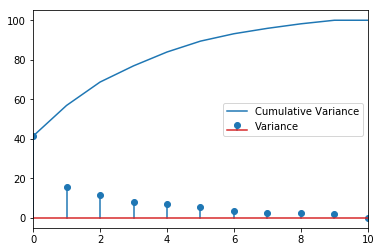

In [100]:
variance=solver.varianceFraction() # this is same as eigenvals/sum(eigenvals)

plt.stem(variance*100.0,label="Variance")
plt.plot(variance.cumsum()*100.0,label="Cumulative Variance")
plt.xlim(0,10,1)
plt.legend()

### Look at the EOF structures and PC time series

In [101]:
# Retrieve the EOFs and PCs
eofs = solver.eofs()
pcs = solver.pcs()

# Retrieve the correlation between the leading PC time series 
# and the input SST anomalies at each grid point.
# eofsasCorr = solver.eofsAsCorrelation()

# Retrieve the EOF expressed as the covariance between the leading  PC time series 
# and the input SST anomalies at each grid point.
# eofsasCov = solver.eofsAsCovariance()

In [102]:
print(np.shape(eofs), np.shape(pcs), 'vs.')
print(np.shape(dataset))

(11, 288, 432, 3) (11, 11) vs.
(11, 288, 432, 3)


## We need the mean image to add the EOFs of variability to

(288, 432, 3)


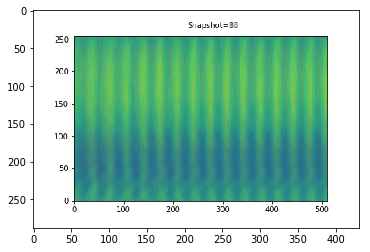

In [104]:
meanimarr = dataset.mean(axis=0)
print(np.shape(meanimarr)) 

meanimg = Image.fromarray(np.uint8(meanimarr))

plt.imshow(meanimg)

## Let's look at the modes

In [105]:
def plot_image_ts(image,ts, label1, label2): 
    fig = plt.figure(figsize=(10, 4))

    ax = fig.add_subplot(121)
    cmap = ax.imshow(image)
    ax.set_title(label1)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(ts) 
    ax2.set_title(label2)

-4.066382452422107 3.39835593177611
-6.614884421004672 6.489392580358541
-6.6386536451352605 6.036901078468937


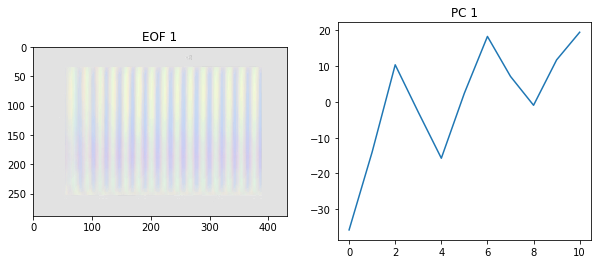

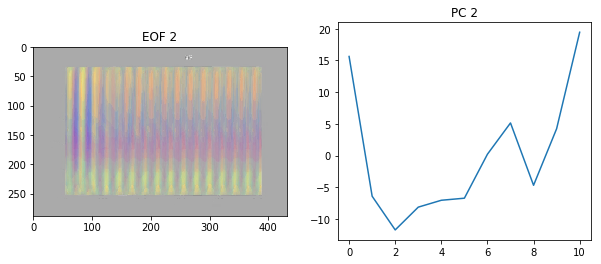

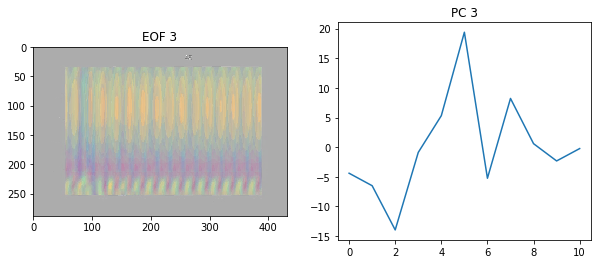

In [106]:
# Put all the magnitude info into the PC for clarity of plotting
for MODE in [0,1,2]:
    xystd = np.std(eofs[MODE,:,:,:].ravel())
    norma = eofs[MODE,:,:,:]/xystd
    print(norma.min(), norma.max())
    imcolor = Image.fromarray(np.uint8(  (norma+norma.min())*(norma.max()-norma.min())   ))
    plot_image_ts(imcolor, pcs[:,MODE]*xystd, \
            'EOF '+str(MODE+1), 'PC '+str(MODE+1))

## Check orthogonality

In [107]:
np.corrcoef(eofs[0,:,:,:].ravel(), eofs[1,:,:,:].ravel())

array([[1.        , 0.00174272],
       [0.00174272, 1.        ]])

In [108]:
np.corrcoef(pcs[:,0], pcs[:,1])

array([[1.00000000e+00, 7.18147791e-17],
       [7.18147791e-17, 1.00000000e+00]])

## Truncated reconstructions: animated
Grab some cells from Unidata's workshop notebook on making animations.
You have to make one image, then animate the others

In [109]:
import matplotlib.animation as manimation
plt.rcParams['animation.html'] = 'jshtml'

In [110]:
def recon(TRUNC, time): 
    data = eofs[0,:,:,:] * pcs[time,0] # Always include the first one
    for i in range(1,TRUNC):
        data += eofs[i,:,:,:] * pcs[time,i]
    return(data)

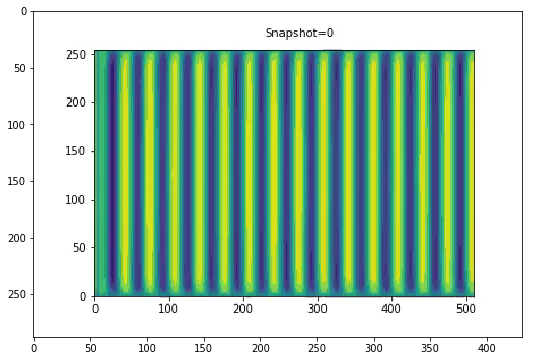

In [111]:
TRUNC = 2 ## Reconstruction truncation level (how many modes) 
TRUNC = NFRAMES ## UNCOMPROMISED: Recover the full image

# Make one figure to set the pattern
fig, ax = plt.subplots(figsize=(14,6))

# The data, then the image
array = meanimarr + recon(TRUNC,0)
img = Image.fromarray(np.uint8(array))

im = ax.imshow(img)

In [112]:
# Build the "artists" list of frames for the animation
artists = []

for it in range(0, len(pcs[:,0])-1):   # time loop over frames

    # The data, then the image
    array = meanimarr + recon(TRUNC,it)
    img = Image.fromarray(np.uint8(array))

    im = ax.imshow(img)
    ax.set_title('Truncation '+str(TRUNC)+' modes')
    artists.append([im]) # NOTE THE LIST

anim = manimation.ArtistAnimation(fig, artists, interval=500)


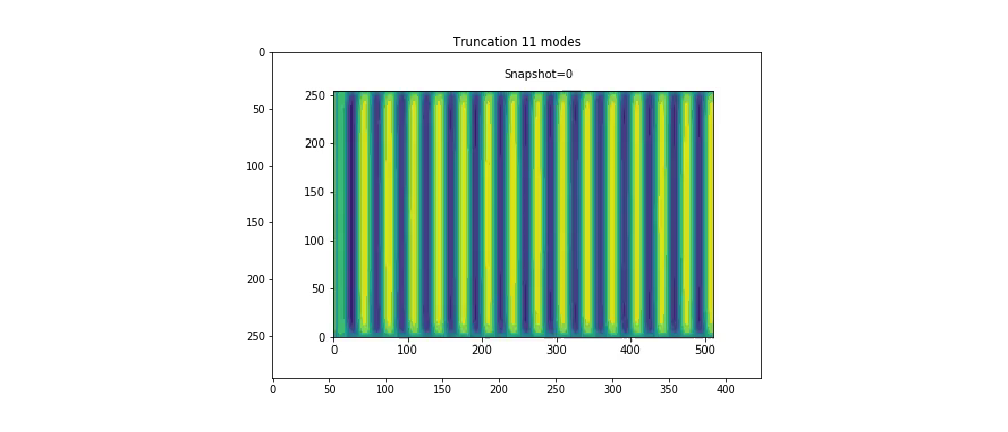
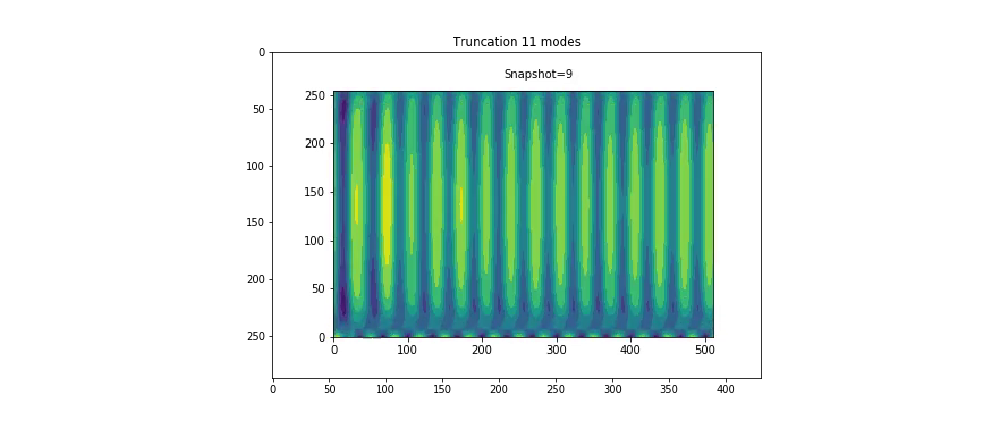
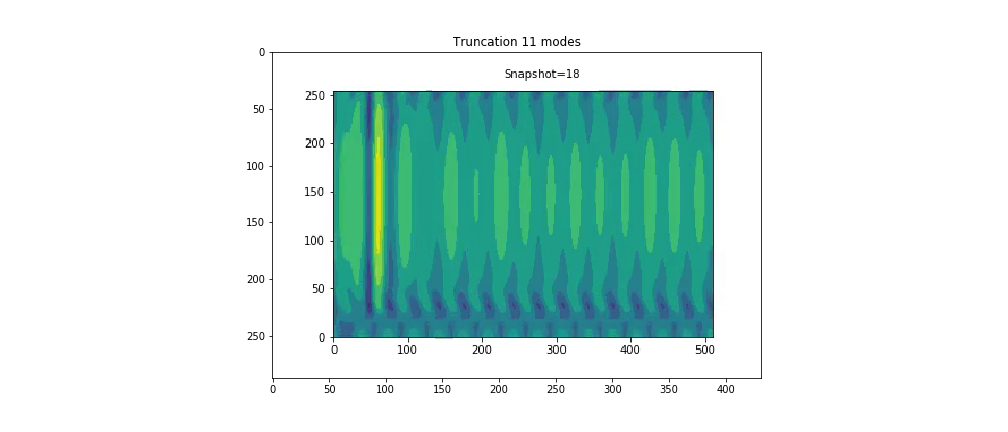
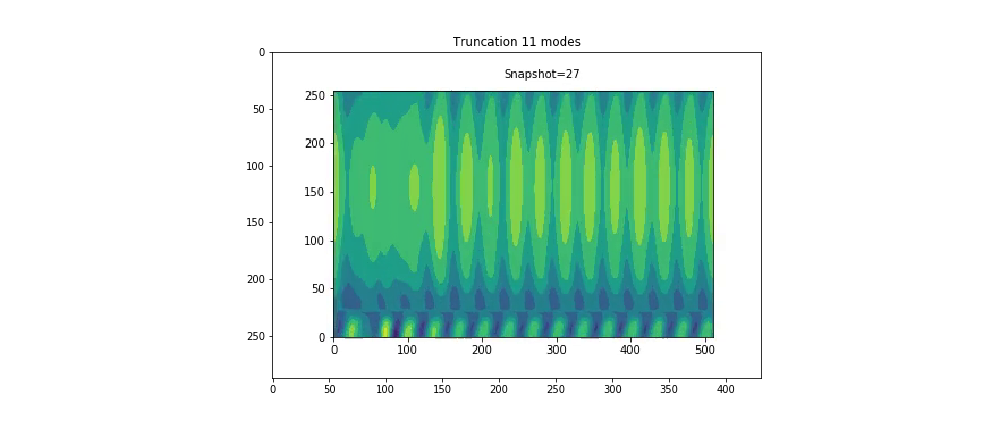
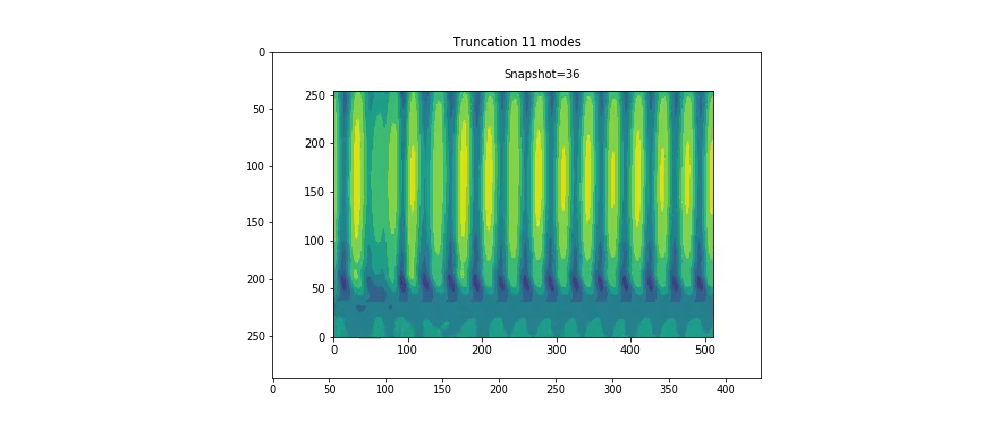
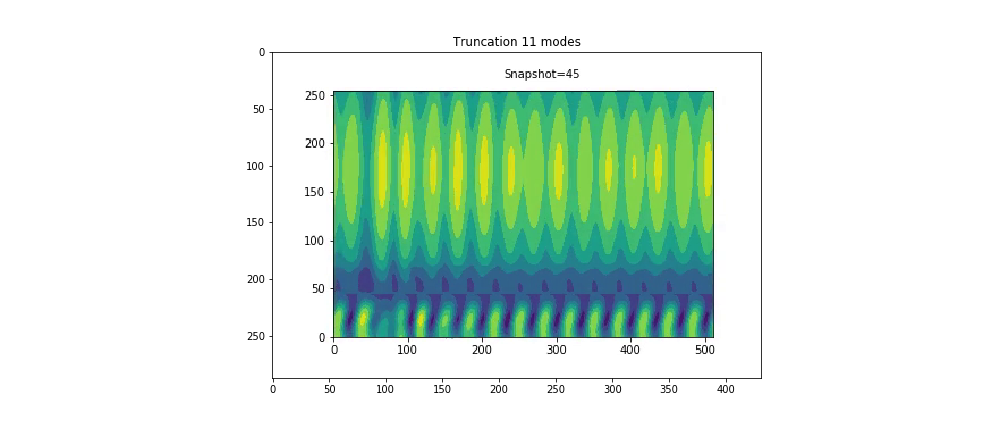
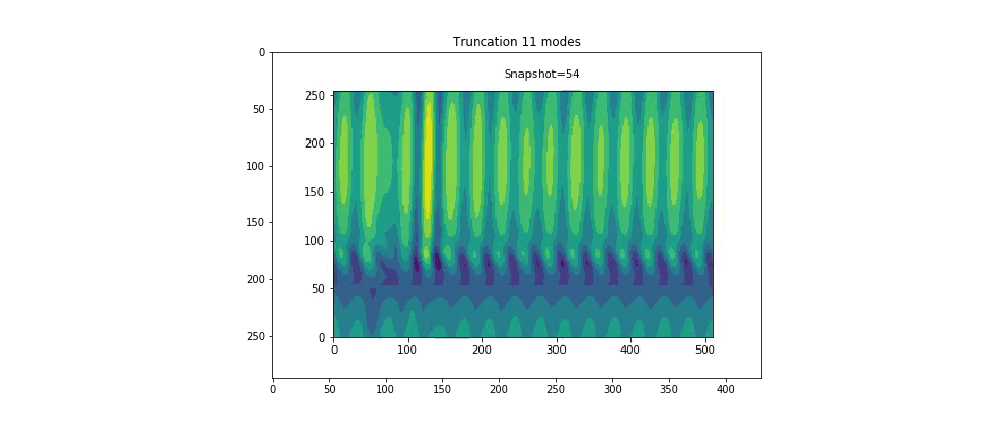
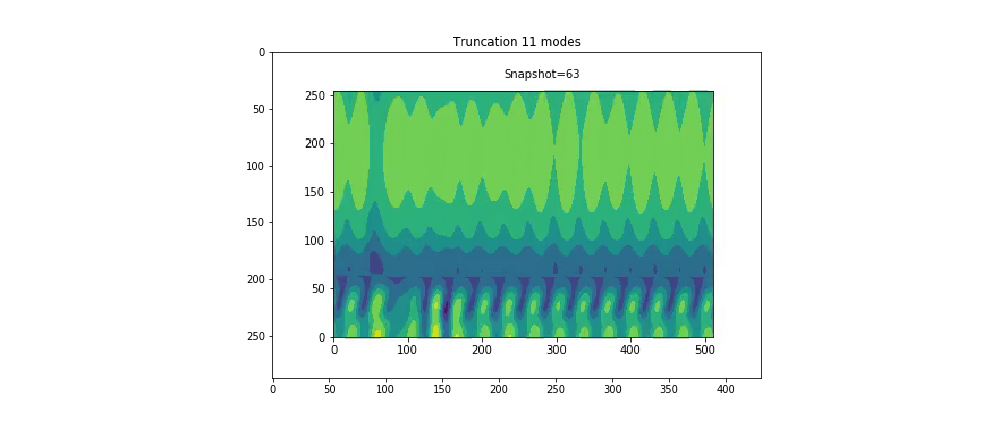
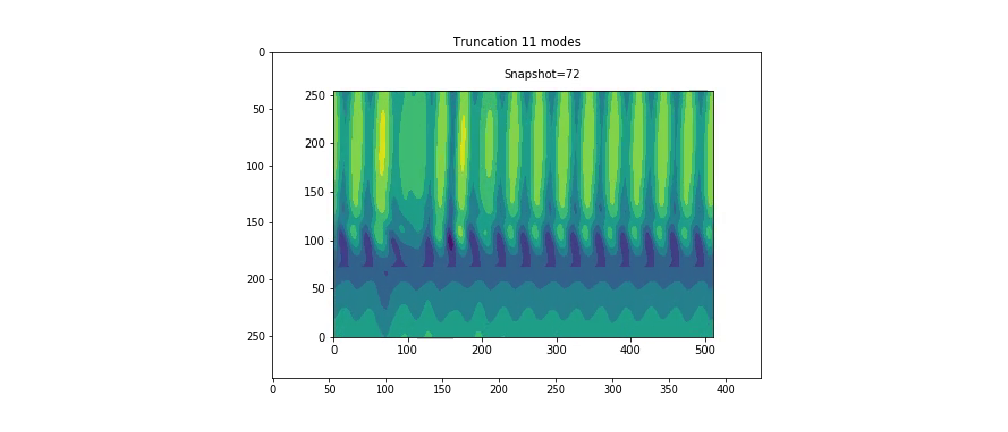
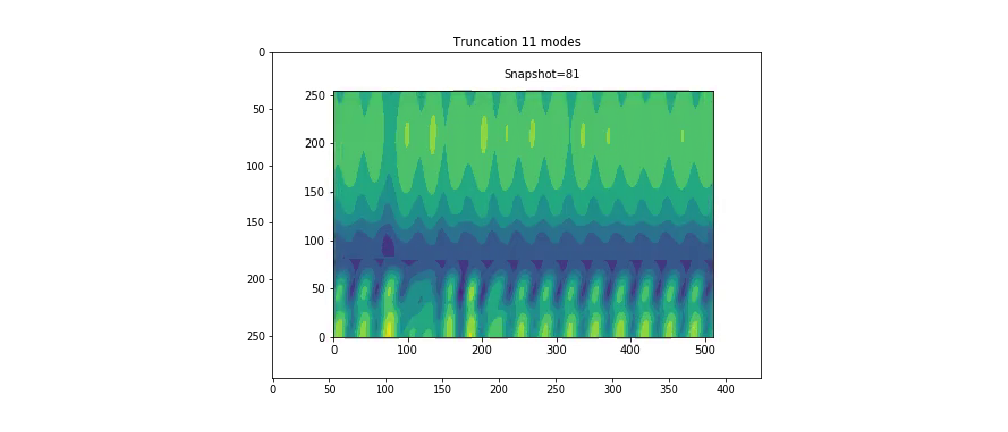

In [114]:
anim


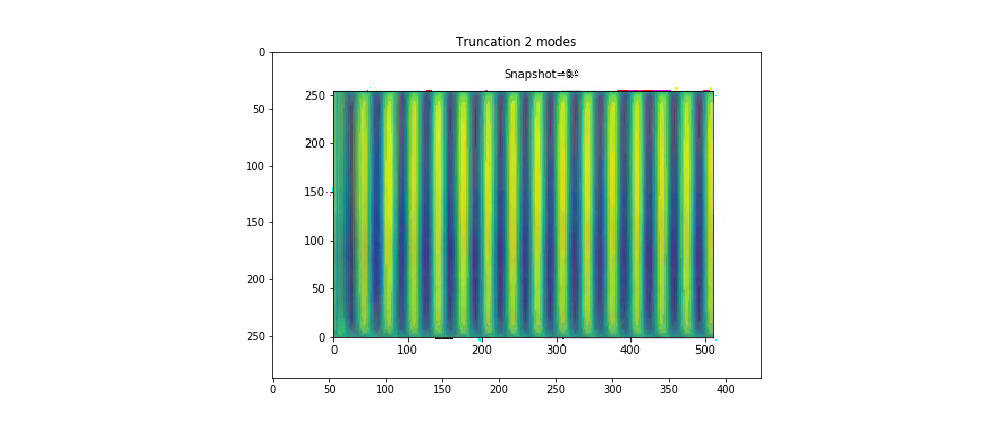
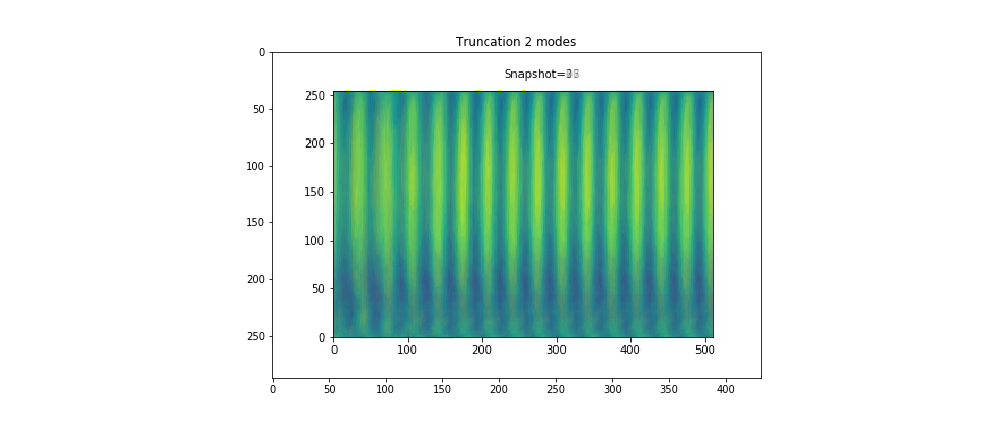
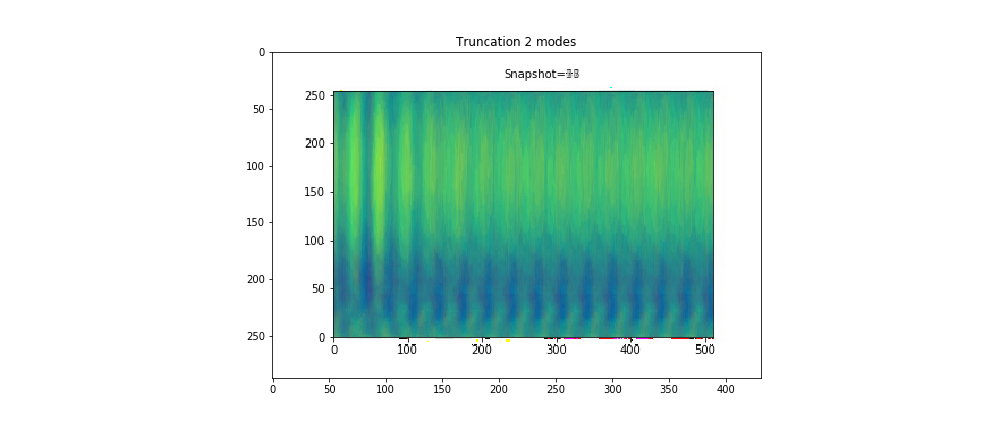
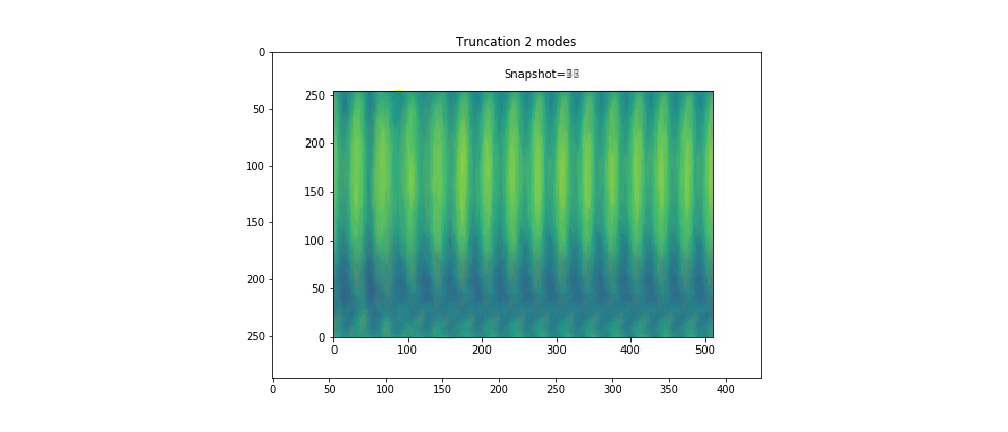
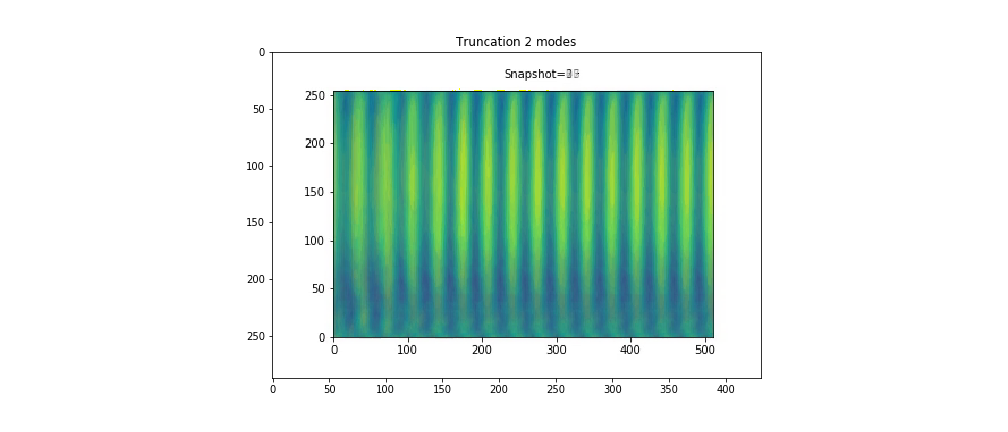
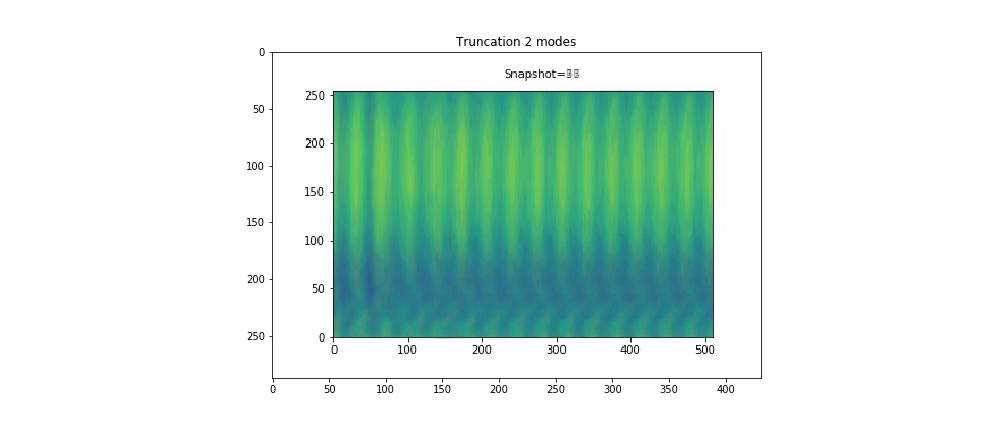
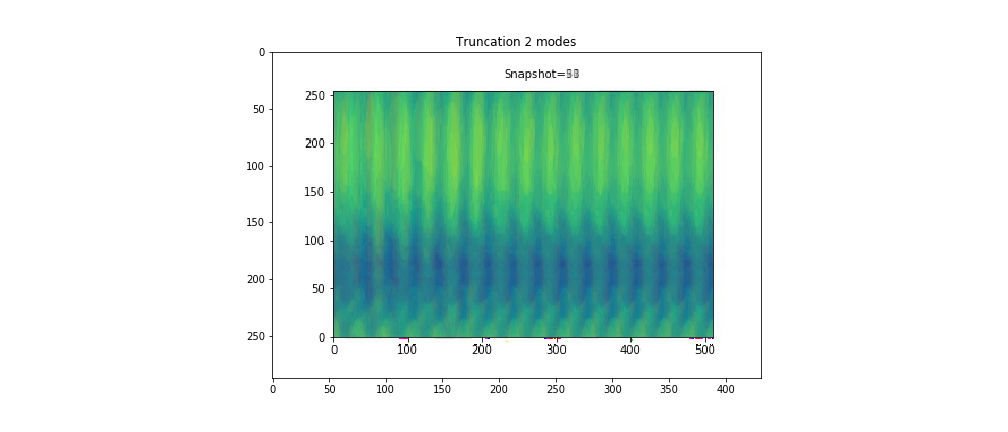
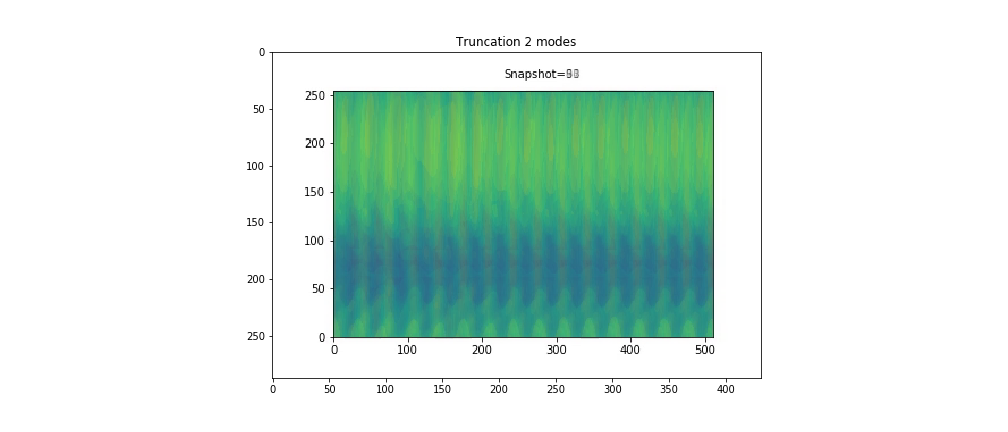
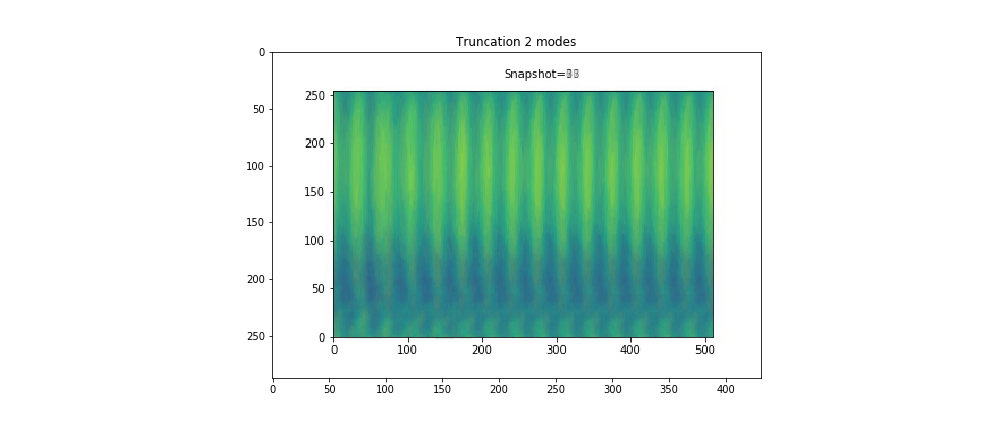
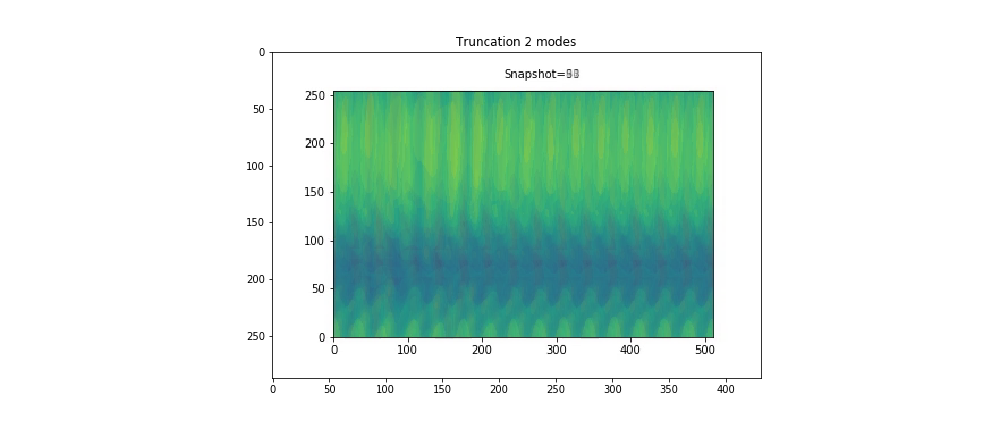
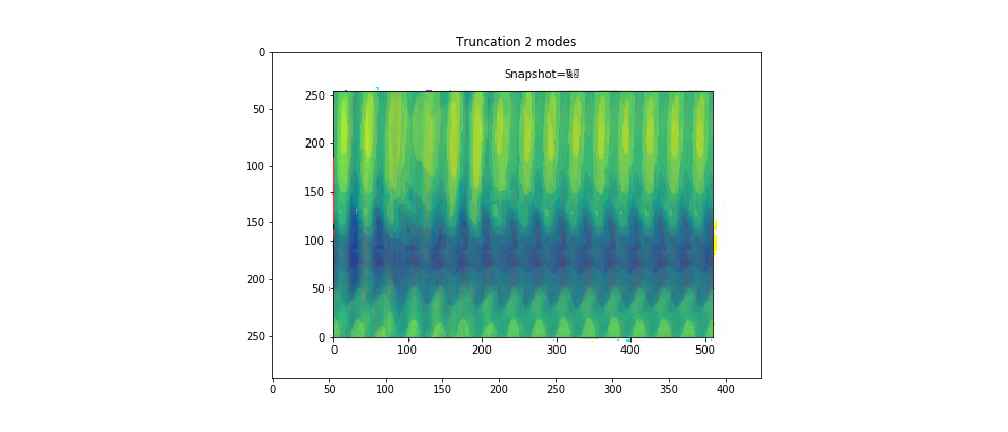

In [115]:
TRUNC = 2 ## Reconstruction truncation level (how many modes)

artists = []

for it in range(0, len(pcs[:,0])):   
    # The data, then the image
    array = meanimarr + recon(TRUNC,it) *0.8 # 80% amplitude anomalies, so it doesn't hit zero and make zany colors
    img = Image.fromarray(np.uint8(array))

    im = ax.imshow(img)
    ax.set_title('Truncation '+str(TRUNC)+' modes')
    artists.append([im]) # NOTE THE LIST

anim = manimation.ArtistAnimation(fig, artists, interval=500)
anim